# Game Theory
This Jupyter notebook contains some practical examples mentioned in the article [If You See Life as a Game, You Better Know How to Play It](https://medium.com/towards-data-science/if-you-see-life-as-a-game-you-better-know-how-to-play-it-f7aaa365caf1?sk=2de90afceb7b428dfebfcebbb255cfe3) published in Towards Data Science.

## Libraries
This notebook uses only three libraries: numpy, random and matplotlib.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Example 1. The cosmic game
The [article]() presents the following problem:

>Somewhere in an uncharted galaxy, you and your friend are being held prisoners by an enigmatic group of extraterrestrial beings. They promise to let you go if you beat them in one of their games. You sit at a cosmic table with one of the aliens who distributes bags containing both a black and a white rock. When the game starts, every player will select a rock and put it on the table. The winner is whoever picks the rock with a different color. This means, whoever chooses black when the other two choose white or whoever chooses white when the other two choose black. Every time someone wins, they will give you a coin to pile up on your side of the table. You will play this game a million times, the final winner is whoever gets more coins at the end. Besides the rules of the game, the only other information you have is that the alien always plays black with a 50% probability. Seconds before the game starts, your partner whispers the strategy you should follow. After a million games, the final score declares both of you as the winners since you got more coins than the alien. Was this pure luck? How important was your partner’s strategy?

The article explains why this game has only one Mixed Strategy Nash Equilibrium when all players choose black or white with 50% probability. It also explains why, in the particular case of this example, the two non-alien players can work as a team to beat the alien if they agree to play inverse strategies. This means that one will play white while the other one plays black. This will guarantee that the alien will lose every game while one of the two friends will win it. 

The next code simulates the game after multiple repetitions. You can change the probability with which each player chooses the color and see how many times they win at the end.


The final score for Player 1 is:  2504
The final score for Player 2 is:  2494
The final score for Player 3 is:  2478


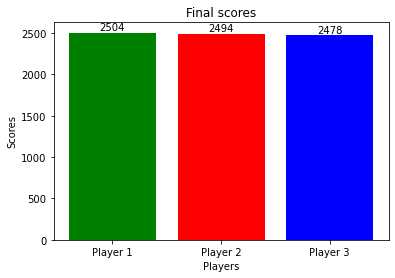

In [15]:
# 1. NUMBER OF REPETITIONS:
iterations=10000

# 2. PROBABILITY FOR EACH PLAYER
Prob1=0.5 #Prob. for Player 1
Prob2=0.5 #Prob. for Player 2
Prob3=0.5 #Prob. for Player 3

# 3. CREATE A VARIABLE "SCORE" TO KEEP TRACK OF EACH PLAYER'S WINS
Score_P1=[]
Score_P2=[]
Score_P3=[]

# 4. REPEAT THE GAME MULTIPLE TIMES AND TOTALIZE THE NUMBER OF TIMES EACH PLAYER WINS
for i in range(iterations):
    q=random.uniform(0,1) #Random number to use with Player 1
    r=random.uniform(0,1) #Random number to use with Player 2
    p=random.uniform(0,1) #Random number to use with Player 3
    
    if q<=Prob1: #Player 1 plays White
        if r<=Prob2 and p<=Prob3: #Player 2 plays White and Player 3 plays White
            S1=0
            S2=0
            S3=0
        if r<=Prob2 and p>Prob3: #Player 2 plays White and Player 3 plays Black
            S1=0
            S2=0
            S3=1
        if r>Prob2 and p<=Prob3: #Player 2 plays Black and Player 3 plays White
            S1=0
            S2=1
            S3=0
        if r>Prob2 and p>Prob3: #Player 2 plays Black and Player 3 plays Black
            S1=1
            S2=0
            S3=0
    else:        #Player 1 plays Black
        if r<=Prob2 and p<=Prob3: #Player 2 plays White and Player 3 plays White
            S1=1
            S2=0
            S3=0
        if r<=Prob2 and p>Prob3: #Player 2 plays White and Player 3 plays Black
            S1=0
            S2=1
            S3=0
        if r>Prob2 and p<=Prob3: #Player 2 plays Black and Player 3 plays White
            S1=0
            S2=0
            S3=1
        if r>Prob2 and p>Prob3: #Player 2 plays Black and Player 3 plays Black
            S1=0
            S2=0
            S3=0
    
    Score_P1.append(S1)
    Score_P2.append(S2)
    Score_P3.append(S3)

# 5. PRINT THE FINAL SCORE FOR EACH PLAYER:
print("The final score for Player 1 is: ", sum(Score_P1))
print("The final score for Player 2 is: ", sum(Score_P2))
print("The final score for Player 3 is: ", sum(Score_P3))

# 6. BAR PLOT OF THE SCORES

# Data for the bar plot
names = ["Player 1", "Player 2", "Player 3"]
scores = [sum(Score_P1), sum(Score_P2), sum(Score_P3)]

# Specify the colors
colors = ['green', 'red', 'blue']

# Plotting the bar chart
plt.bar(names, scores, color=colors)

# Adding labels and title
plt.xlabel("Players")
plt.ylabel("Scores")
plt.title("Final scores")

# Adding scores on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score + 1, str(score), ha='center', va='bottom')

# Display the plot
plt.show()



## Example 2. The protection plan

The [article](https://medium.com/towards-data-science/if-you-see-life-as-a-game-you-better-know-how-to-play-it-f7aaa365caf1?sk=2de90afceb7b428dfebfcebbb255cfe3) presents this other problem:

>After saving all year and waiting for Black Friday, you finally decide you will buy the \\$1000 TV you always wanted. Just before checking out, the cashier asks you if you want to buy a protection plan (PP) for “just \\$175 more”. This protection plan will cover expenses related to your TV in the following 4 years. Is this a good idea?

This problem can be summarized in the following payoff matrix:

| Company\Buyer | Add PP   | Don't add PP |
|----------|----------|----------|
| TV breaks down in the next 4 years | (675, -1175) | (1000, -1500) |
| TV doesn't break down in the next 4 years | (1175, -1175) | (1000, -1000) |

In the previous matrix it is assumed that the cost of repairing the TV is \\$500 which is payed by the company or the buyer depending on the case. There is a Nash Equilibrium in the case where the buyer does not add the PP and TV does not break down.

### Buyer's point of view

In this case we should find the probability of the TV breaking down ($q$) so that the buyer is indifferent between adding or not the PP. This means that the expected value in both scenarios is the same:

$- 1175\times q -1175\times (1-q) = -1500\times q -1000\times (1-q)$

$ q=0.35 $

This means that if a TV has a probability of failure of less than 0.35 then the Expected value **adding** the PP represent a higher cost for the buyer. In the following plot you can see the Expected Cost for both scenarios. Note how adding the PP represents the same cost regardless of the probability of the TV breaking down. However in the case where the buyer does not add the PP there are some cases where the cost ends up being higher than adding the PP. This plot considers the cost of the PP and the repair.

In addition to this plot, this code calculates how much a buyer would spend if he buys multiple TVs with and without the PP.

q is:  0.35


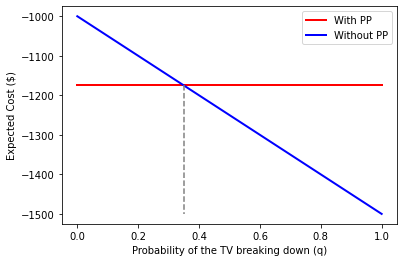

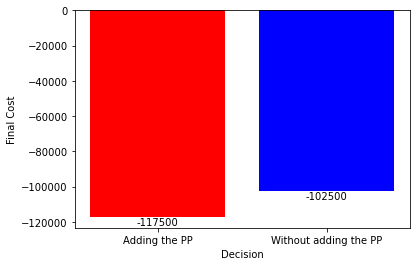

In [36]:
# 1. NUMBER OF REPETITIONS:
iterations=100

# 2. COSTS AND PROBABILITY OF FAILURE
Prob=0.04 #Real Probability of the TV breaking down
TV=1000 #Cost of the TV
PP=175 #Cost of the Protection Plan
REP=500 #Cost of repairing the TV

# 3. CALCULATE q
q=PP/REP
print('q is: ', q)

# 4. PLOT COST VS q FOR THE TWO SCENARIOS
Probs=np.linspace(0, 1, 10)
WithPP=(-TV-PP)*np.ones(10)
WithoutPP=(-(TV+REP)*Probs-TV*(1-Probs))

plt.plot(Probs, WithPP, label='With PP', color='red', linewidth=2)
plt.plot(Probs, WithoutPP, label='Without PP', color='blue', linewidth=2)
plt.plot(np.array([q,q]),np.array([-TV-PP,WithoutPP[-1]]), color='grey', linestyle='--')
plt.legend()
plt.xlabel('Probability of the TV breaking down (q)')
plt.ylabel('Expected Cost ($)')
plt.show()

# 5. BUYING MULTIPLE TVs WITH AND WITHOUT THE PP
# Adding the PP
TotalCost_w_PP=(-TV-PP)*iterations
TotalCost_wo_PP=[]
# Without adding the PP
for i in range(iterations):
    p=random.uniform(0,1)
    if p<Prob:
        Cost=(-TV-REP)
    else:
        Cost=-TV
    TotalCost_wo_PP.append(Cost)

# 6. BAR PLOT OF THE COSTS

# Data for the bar plot
names = ["Adding the PP", "Without adding the PP"]
costs = [TotalCost_w_PP, sum(TotalCost_wo_PP)]

# Specify the colors
colors = ['red', 'blue']

# Plotting the bar chart
plt.bar(names, costs, color=colors)

# Adding labels and title
plt.xlabel("Decision")
plt.ylabel("Final Cost")

# Adding scores on top of the bars
for i, score in enumerate(costs):
    plt.text(i, score + 1, str(score), ha='center', va='top')

# Display the plot
plt.show()

### Seller's point of view
From a seller's perspective, an important question is: "Knowing that the probability of a TV breaking down in the first 4 years is $x$, what should be the price of the PP so that I don’t care if people add the PP or not?" In this case we can also equalize the expected value **for the seller** if the buyer adds the PP or if he doesn't. This will also result in $q=0.35$. This means that if the TV breaks down with a probability of 0.35, the seller will have the same expected value ($1000) regardless of what the buyer decides to do. However, if the probability of the TV breaking down is less than 0.35 (which usually is), then the expected value for the seller is higher when the buyer adds the PP.

We can run an experiment and calculate what the expected value is after multiple TV sales. Note how the cost of the PP so that the seller is indifferent between selling the PP or not is \\$20 if we consider that the real probability of TV breaking down is 0.04. By setting the PP to \\$175 the seller ensures that his expected value is always higher in the scenario where someone adds the PP (and probably the TV breaks down) than the scenario in which they don't.

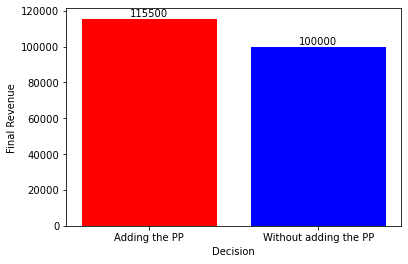

In [43]:
# 1. NUMBER OF REPETITIONS:
iterations=100

# 2. COSTS AND PROBABILITY OF FAILURE
Prob=0.04 #Real Probability of the TV breaking down
TV=1000 #Cost of the TV
PP=175 #Cost of the Protection Plan
REP=500 #Cost of repairing the TV

# 3. SELLING MULTIPLE TVs WITH AND WITHOUT THE PP
Earnings_w_PP=[]
Earnings_wo_PP=[]
for i in range(iterations):
    p=random.uniform(0,1)
    if p<Prob: #In this case, the TV breaks down
        Rev_w_PP=TV+PP-REP #The seller pays the repair
        Rev_wo_PP=TV #The seller doesn't pay the repair
    else:      #In this case, the TV doesn't break down
        Rev_w_PP=TV+PP
        Rev_wo_PP=TV
    Earnings_w_PP.append(Rev_w_PP)
    Earnings_wo_PP.append(Rev_wo_PP)

# 4. BAR PLOT OF THE EARNINGS

# Data for the bar plot
names = ["Adding the PP", "Without adding the PP"]
earnings = [sum(Earnings_w_PP), sum(Earnings_wo_PP)]

# Specify the colors
colors = ['red', 'blue']

# Plotting the bar chart
plt.bar(names, earnings, color=colors)

# Adding labels and title
plt.xlabel("Decision")
plt.ylabel("Final Revenue")

# Adding scores on top of the bars
for i, score in enumerate(earnings):
    plt.text(i, score + 1, str(score), ha='center', va='bottom')

# Display the plot
plt.show()


## Conclusion

From fictitious scenarios such as alien’ encounters to going shopping, our lives are filled with decisions that carry different consequences. These consequences are not only a product of our decisions but of other’s decisions which in turn depend on someone else’s decisions. While we cannot control what others do, we can learn to analyze every problem as a game that involves players, strategies and payoffs. This is exactly what Game Theory stands for and why it has so many applications. Next time you are faced with a decision to take, remember this, perhaps it will save some bucks or some years in jail!
